# Data Story

## <span style="color:magenta"> Hypothesis </span>


My hypothesis is that if one can identify the most important relationships in the million song dataset, then predicting what songs will make it into the Billboard Hot 100 will be possible with a statisically significant accuracy.

## <span style="color:magenta"> Initial Findings </span>



## <span style="color:blue"> *Bar Plot (Top 20 Tags By Frequency)* </span>


Visualizing the tags that most top songs fall under helps give some context for the kinds of songs that consistently rank in the The
Billboard Hot 100 year over year. For example, we can tell from this chart that at least 8 of these tags are geographically oriented,
which might possibly have implications for the language an artist should use to have reliable chances of making it into the Hot 100.




In [8]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline
plt.show()

In [9]:
# Loading Artist Tag CSV into Pandas, Changing Index and Showing Head

tagdf = pd.read_csv('8_artisttag.csv', names=['EchoNestArtistID','Tag'])
tagdf.index += 1
tagdf.head()

,EchoNestArtistID,Tag
1,AR002UA1187B9A637D,uk
2,AR002UA1187B9A637D,rock
3,AR002UA1187B9A637D,garage rock
4,AR006821187FB5192B,bass
5,AR00A6H1187FB5402A,detroit


In [10]:
# Changing Data Frame

tagdf['Tag'][:2]

1      uk
2    rock
Name: Tag, dtype: object

In [11]:
# Value Counts

tagdf['Tag'].value_counts().head()

classic pop and rock    1073
american                1027
uk                      1013
british                  975
rock and indie           920
Name: Tag, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

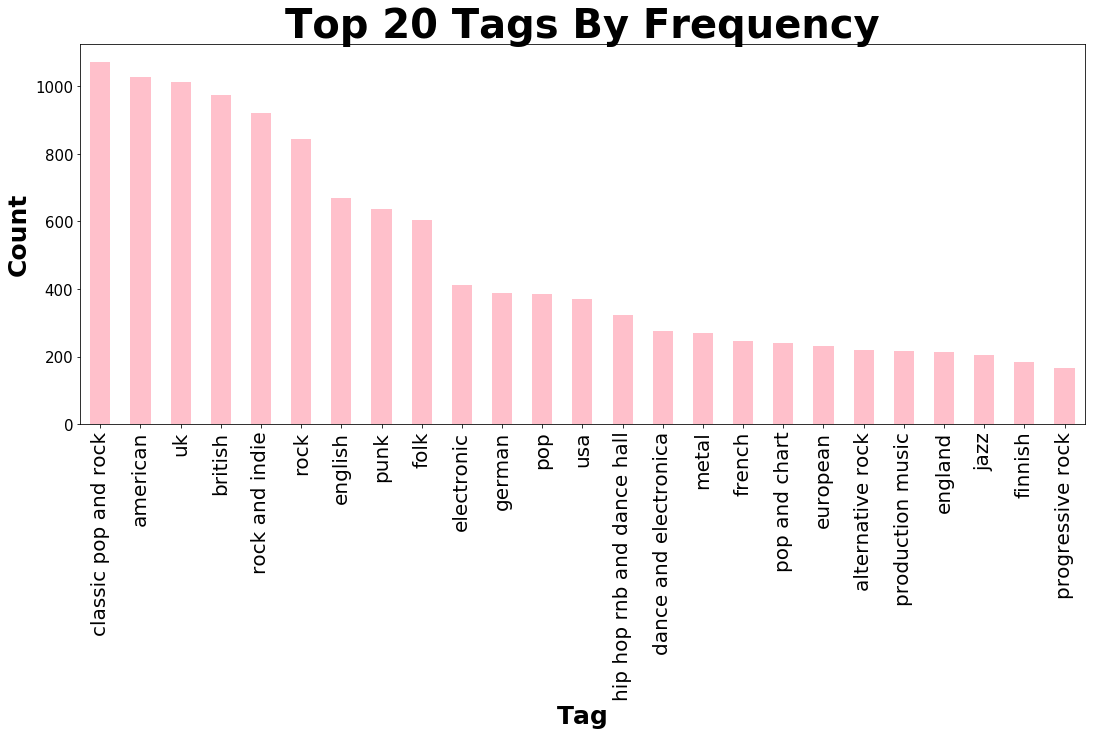

In [12]:
tagdf['Tag'].value_counts()[:25].plot(kind='bar', figsize=(18,7), color='pink')
plt.xlabel("Tag", fontsize = 25, fontweight='bold')
plt.xticks( fontsize = 15)
plt.ylabel("Count", fontsize=25, fontweight='bold')
plt.yticks( fontsize = 15)
plt.title('Top 20 Tags By Frequency',fontsize= 40, fontweight='bold')
plt.xticks( fontsize = 20)

Most of the tags here fall into the classic pop and rock category, with the least amount of tags being alternative rock. This could
indicate that studios already seek to publish classic pop and classic rock songs more often than alternative rock songs, or that there is
simply a larger market for classic pop and classic rock songs.

In [13]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv', names=['Track_ID','Title','Song_ID','Release','EchoNestArtistID','Artist_MBID','Artist_Name','Duration','Artist_Familiarity','Artist_Hotttnesss','Year','Track_7digitalid','shs_perf','shs_work'])
df.head()

,Track_ID,Title,Song_ID,Release,EchoNestArtistID,Artist_MBID,Artist_Name,Duration,Artist_Familiarity,Artist_Hotttnesss,Year,Track_7digitalid,shs_perf,shs_work
0,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822100201,0.394031892714,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439603966677,0.356992107756,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643680572058,0.437503836595,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501159656,0.372349068517,2003,2168257,-1,0


In [14]:
df['Artist_Name'][:3]

0         artist_name
1    Faster Pussy cat
2    Karkkiautomaatti
Name: Artist_Name, dtype: object

In [15]:
# Which artists have been in the Billboard Hot 100 The Most?

df['Artist_Name'].value_counts().head()

Michael Jackson    194
Johnny Cash        193
Beastie Boys       187
Joan Baez          181
Neil Diamond       176
Name: Artist_Name, dtype: int64

In [16]:
(plt.figure())

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## <span style="color:blue"> *Bar Plot (Top 20 Artists By Frequency)* </span>


Visualizing the frequency that the top 20 artists on the chart occur within helps give some insight into possible trends of the chart. For
example, we can tell from this chart that the top 20 artists are predominantly male. This could possibly have implications for studio bias
and their clients.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text yticklabel objects>)

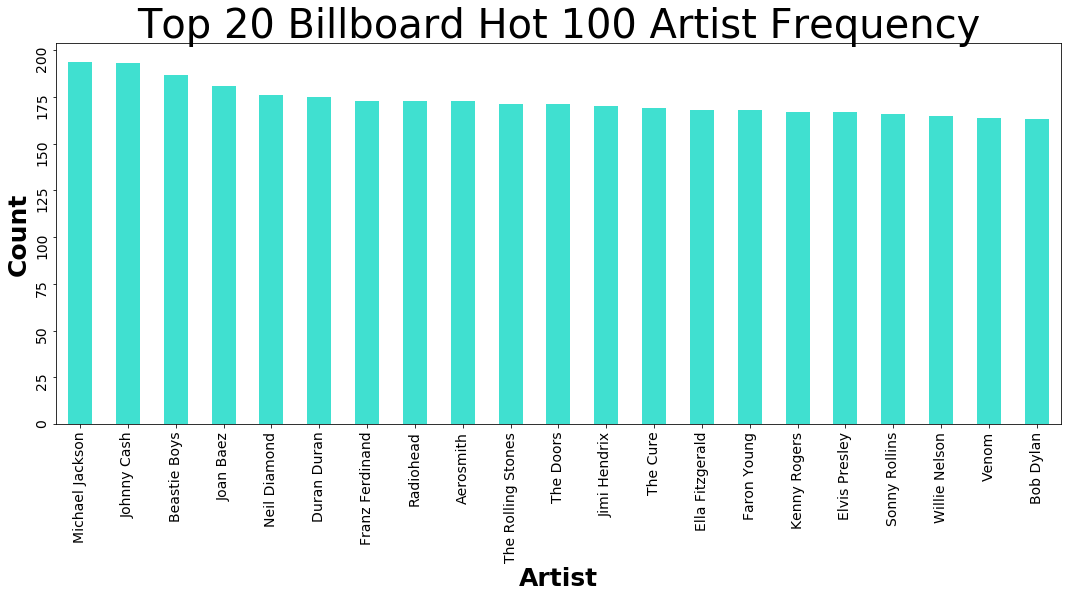

In [17]:
# Plotting Top 20 Artists By Value Count / Frequency

df['Artist_Name'].value_counts()[0:21].plot(kind='bar', fontsize=10, figsize=(18,7), colors='turquoise')
plt.xlabel("Artist", fontsize=25, fontweight='bold')
plt.ylabel("Count", fontsize=25, fontweight='bold')
plt.title('Top 20 Billboard Hot 100 Artist Frequency',fontsize= 40)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)

## <span style="color:blue"> What is the relationship between mean song duration and year? </span>


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
5,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [20]:
df = df[(df[['year']] != 0).all(axis=1)]
df

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
8,TRMMMBB12903CB7D21,2 Da Beat Ch'yall,SOEYRFT12AB018936C,Da Bomb,AR3Z9WY1187FB4CDC2,bf61e8ff-7621-4655-8ebd-68210645c5e9,Kris Kross,221.20444,0.588156,0.401092,1993,6435649,-1,0
11,TRMMMNS128F93548E1,L'antarctique,SOYGNWH12AB018191E,Des cobras des tarentules,AR59BSJ1187FB4474F,891fccfc-24c1-4bfd-bf49-c736e59e443f,3 Gars Su'l Sofa,68.96281,0.555014,0.352949,2007,7192392,-1,0
12,TRMMMXJ12903CBF111,El hijo del pueblo,SOLJTLX12AB01890ED,32 Grandes Éxitos CD 2,ARCVIFR1187B99129F,ec57c22f-9bb7-48ab-aa85-dab108a71b53,Jorge Negrete,168.22812,0.541390,0.369096,1997,7928975,-1,0
14,TRMMMBW128F4260CAE,Pilots,SOMPVQB12A8C1379BB,The Loyal,AREMPER1187B9AEB42,14efbb08-c3d8-404c-9ead-ad71fa586ee6,Tiger Lou,318.45832,0.621826,0.406985,2005,2218694,-1,0
16,TRMMMKI128F931D80D,006,SOSDCFG12AB0184647,Lena 20 År,ARSB5591187B99A848,fba3e876-68f1-4a1f-99d9-c604480202ba,Lena Philipsson,262.26893,0.529819,0.410229,1998,6010886,-1,0
17,TRMMMUT128F42646E8,(Looking For) The Heart Of Saturday,SOBARPM12A8C133DFF,Cover Girl,ARDW5AW1187FB55708,42222090-c5e5-4243-8582-c29bc8b63ec6,Shawn Colvin,216.47628,0.685503,0.446733,1994,3156269,-1,0


In [21]:
df.describe()

,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
count,515576.000000,515576.000000,515576.000000,515576.000000,5.155760e+05,515576.000000,515576.000000
mean,246.869039,0.598259,0.415789,1998.397233,3.986948e+06,1274.647222,677.966719
std,115.546554,0.124770,0.108175,10.930534,2.614970e+06,10553.387793,6428.460558
min,0.313020,-1.000000,-1.000000,1922.000000,-1.000000e+00,-1.000000,-938.000000
25%,183.144040,0.517292,0.364339,1994.000000,1.735688e+06,-1.000000,0.000000
50%,229.955460,0.595546,0.409634,2002.000000,3.559194e+06,-1.000000,0.000000
75%,287.137510,0.678009,0.468463,2006.000000,6.141520e+06,-1.000000,0.000000
max,3024.665670,1.000000,1.082503,2011.000000,9.090599e+06,151082.000000,117287.000000


In [22]:
# Create DataFrame that consists of only duration and year

df = df[['duration', 'year']]
df.head()

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
8,221.20444,1993


In [23]:
# Remove all values that equal 0 in the year column

df = df[(df[['year']] != 0).all(axis=1)]
df.head()

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
8,221.20444,1993


## <span style="color:blue"> Mean and groupby </span>

 * Group the DataFrame by the year column
 * Compute the mean across the duration column for each year group
 * Set the index_parameter to false to prevent the year heading from falling out



In [24]:
#again, we set the index_parameter to false to prevent the year heading from falling out
def convert_string_float(x):
    try:
        return float(x)
    except:
        return 0.0
    
df = df[['duration', 'year']].copy()
df = df.reindex(columns = ['duration', 'year'])
df['duration'] = df['duration'].apply(lambda x: convert_string_float(x))
dfmeand = df.groupby(['year'], as_index=False).mean()
dfmeand.index += 1
dfmeand.head()

,year,duration
1,1922,222.236282
2,1924,186.169016
3,1925,185.584619
4,1926,185.908892
5,1927,183.896728


## <span style="color:blue"> *Line Plot of Mean Song Duration per Year* </span>


* Visualizing this tells us that mean song duration (in seconds) has increased over time.

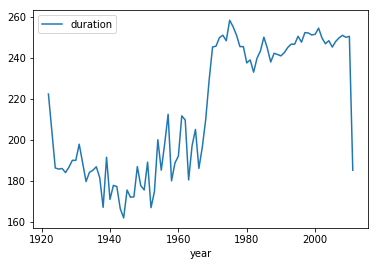

In [25]:
dfmeand.plot('year')

## <span style="color:blue"> *Density Plot of Mean Song Duration per Year* </span>


* Visualizing this tells us that the most common run times for songs are around 180 seconds and 250 seconds.

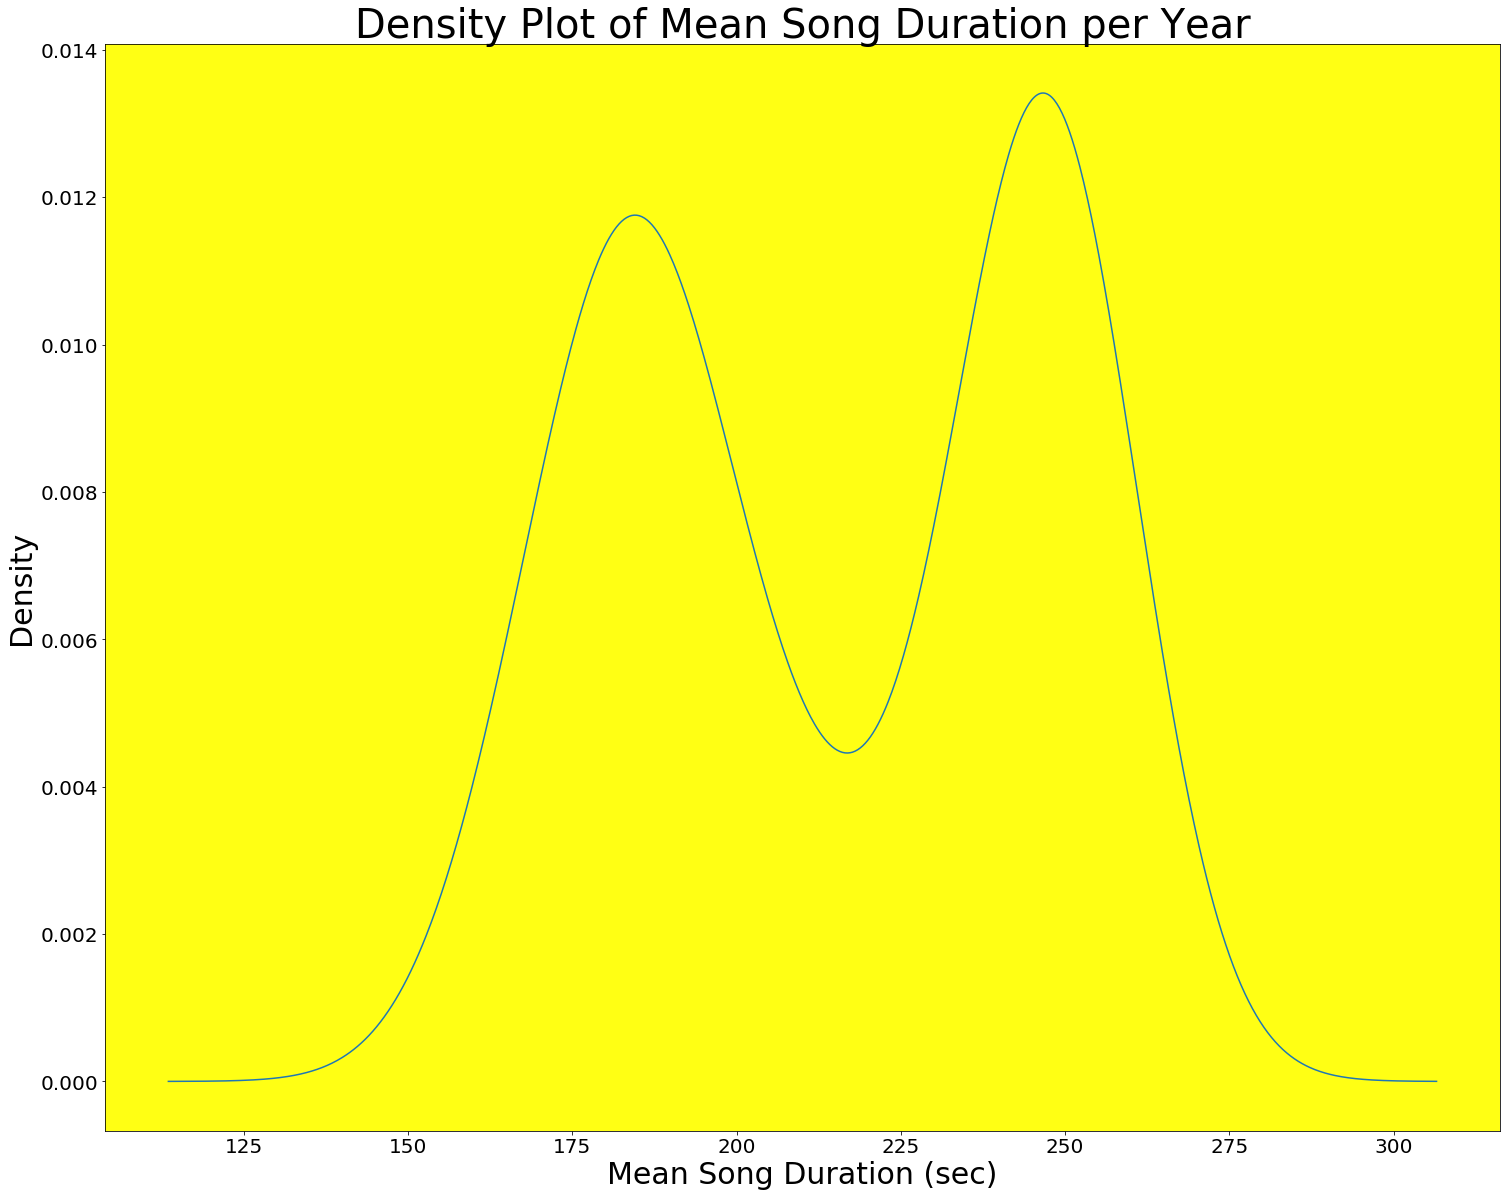

In [26]:
dfmean = df.groupby('year').duration.mean().plot.kde(figsize=(25,20))
dfmean.set_facecolor('xkcd:yellow')
plt.xlabel("Mean Song Duration (sec)", fontsize=30)
plt.xticks( fontsize = 20)
plt.yticks( fontsize = 20)
plt.ylabel("Density", fontsize=30)
plt.title('Density Plot of Mean Song Duration per Year',fontsize= 40)
rcParams['figure.figsize'] = 11.7,8.27

## <span style="color:blue"> *Seaborn Density Plot Binned w/Histogram* </span>


* I believe this is showing me the density of songs in the dataset per year. The height of the histogram represents the density in the dataset, and the y-axis has been binned by year.

In [27]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [28]:
# create dataframe only with year and clean values = 0 
dfyear = df[(df[['duration', 'year']] != 0).all(axis=1)]
dfyear.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
7,TRMMMBB12903CB7D21,2 Da Beat Ch'yall,SOEYRFT12AB018936C,Da Bomb,AR3Z9WY1187FB4CDC2,bf61e8ff-7621-4655-8ebd-68210645c5e9,Kris Kross,221.20444,0.588156,0.401092,1993,6435649,-1,0


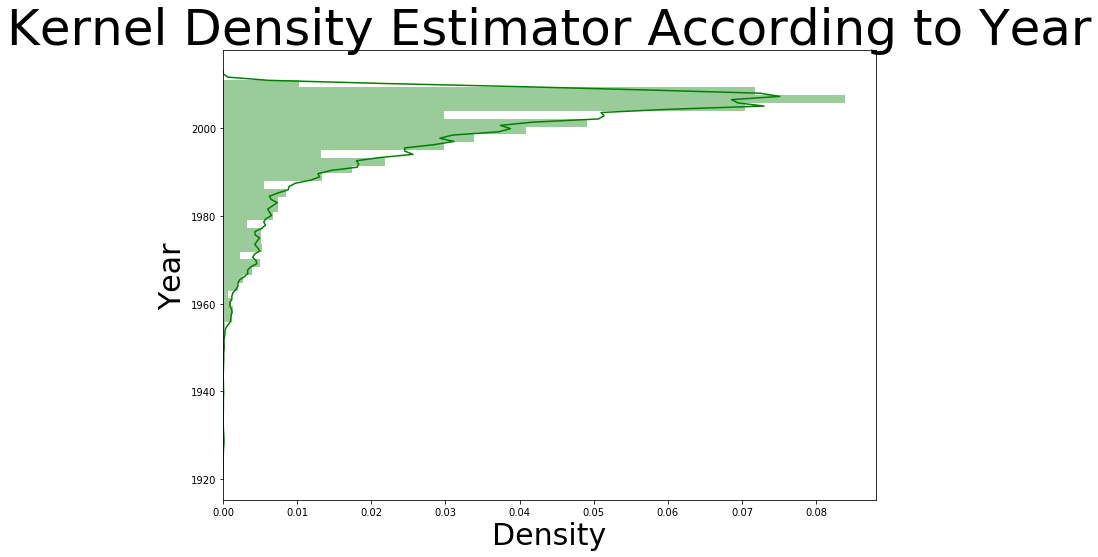

In [29]:
sns.distplot(dfyear.year, vertical=True, color="g")
plt.xlabel("Density", fontsize=30)
plt.ylabel("Year", fontsize=30)
plt.title("Kernel Density Estimator According to Year", size = 50) 
rcParams['figure.figsize'] = 12, 9
plt.show()

## <span style="color:blue"> *Seaborn scatterplot of 89 data points from mean song duration data frame* </span>

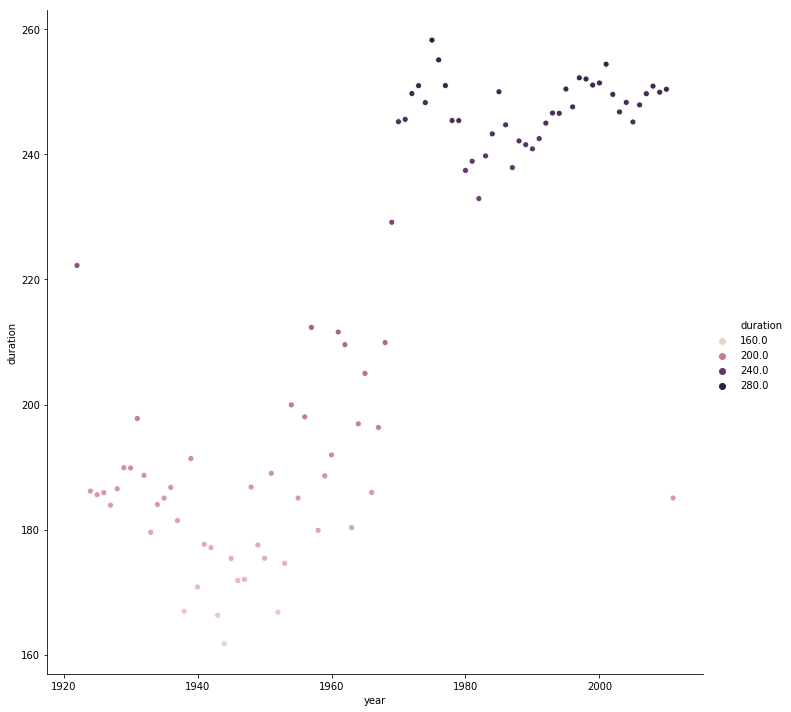

In [30]:
sns.relplot(x="year", y="duration", hue="duration", data=dfmeand,  height=10, aspect=1,)

## <span style="color:blue"> *Seaborn line plot of dfmeand* </span>
> We see here that there is a linear relationship between ascending year and mean song duration

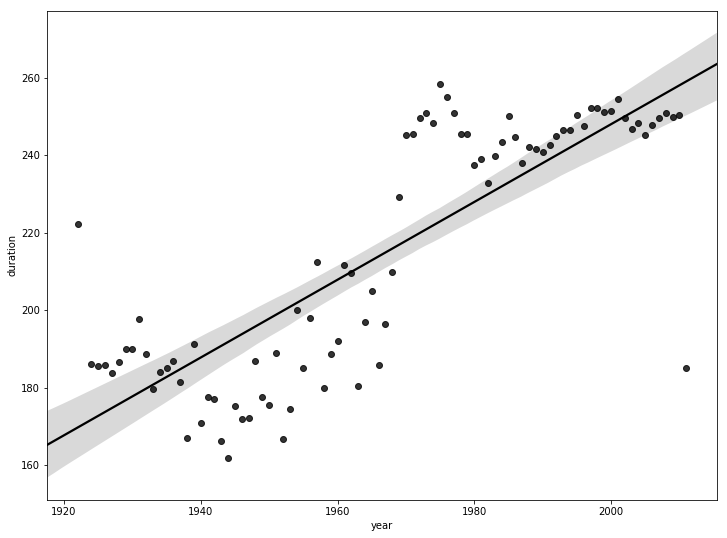

In [31]:
sns.regplot(x="year", y="duration", data=dfmeand, color="black")

# <span style="color:purple"> **Inferential Statistics** </span>


## <span style="color:blue"> *LOESS curve fitted to mean song duration per year dataset* </span>
* Obviously there is a positive linear relationship here, but on visual inspection, we know there is more to the story....so we will use a lowess curve for smoothing

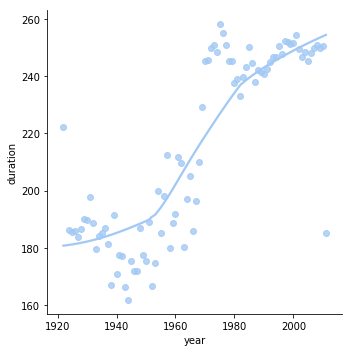

In [32]:
sns.set_palette("pastel")
sns.lmplot(x="year", y="duration", data=dfmeand,
    lowess=True)

### Jumping back to our full dataset, df
   > * The df dataset contains the year and duration of each song, cleaned of any zero values.
   > * The df dataset has the duration of 515576 songs.

In [33]:
dfyear.info

<bound method DataFrame.info of                   track_id                                           title  \
0       TRMMMYQ128F932D901                                    Silent Night   
1       TRMMMKD128F425225D                                     Tanssi vaan   
2       TRMMMRX128F93187D9                               No One Could Ever   
3       TRMMMCH128F425532C                                   Si Vos Querés   
7       TRMMMBB12903CB7D21                               2 Da Beat Ch'yall   
10      TRMMMNS128F93548E1                                   L'antarctique   
11      TRMMMXJ12903CBF111                              El hijo del pueblo   
13      TRMMMBW128F4260CAE                                          Pilots   
15      TRMMMKI128F931D80D                                             006   
16      TRMMMUT128F42646E8             (Looking For) The Heart Of Saturday   
17      TRMMMQY128F92F0EA3                               Ethos of Coercion   
18      TRMMMTK128F424EF7C      

## <span style="color:blue"> *Seaborn line plot of full cleaned dataset, dfyear* </span>

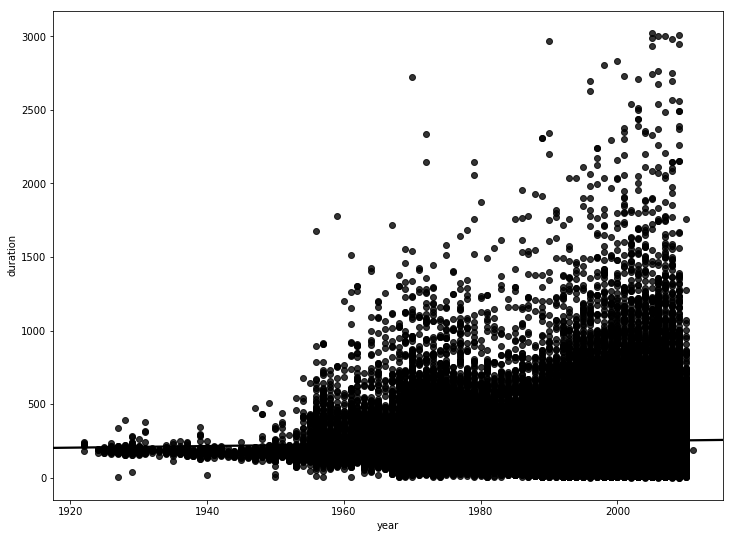

In [37]:
sns.regplot(x="year", y="duration", data=dfyear, color="black")

## <span style="color:blue"> *Seaborn scatter plot of full cleaned dataset, dfyear* </span>

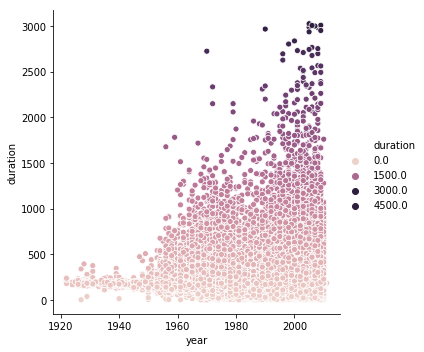

In [35]:
sns.relplot(x="year", y="duration", hue="duration", data=dfyear)

In [41]:
dfyear.corr()

,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
duration,1.000000,-0.007699,-0.002254,0.052289,0.015097,-0.019543,-0.020322
artist_familiarity,-0.007699,1.000000,0.732993,0.021128,-0.116086,0.023635,0.032031
artist_hotttnesss,-0.002254,0.732993,1.000000,-0.001093,-0.079963,0.029921,0.036287
year,0.052289,0.021128,-0.001093,1.000000,0.109126,-0.068198,-0.076128
track_7digitalid,0.015097,-0.116086,-0.079963,0.109126,1.000000,-0.013966,-0.011187
shs_perf,-0.019543,0.023635,0.029921,-0.068198,-0.013966,1.000000,0.747060
shs_work,-0.020322,0.032031,0.036287,-0.076128,-0.011187,0.747060,1.000000


# Need to interperet these



## <span style="color:purple"> *Pearson Coefficient Between Year and Mean Song Duration r = 0.816685* </span>

In [42]:
# create numpy arrays for the binary variables year and duration from the dfmeand dataframe
year = dfmeand.year.values
duration = dfmeand.duration.values


# compute the pearson correlation coefficient (r) between year and duration
r = np.corrcoef(year, duration)[0,1]

# print out r, rounded to six decimal places
print('**The Pearson Correlation Coefficient between year and duration is r =', round(r, 6))

# show a cross-tab of this relationship
print('\nCrosstab:\n')
print(pd.crosstab(dfmeand['duration'], dfmeand['year'], margins=True, normalize=True))

dfmeand.corr()


**The Pearson Correlation Coefficient between year and duration is r = 0.816685

Crosstab:

year                    1922      1924      1925      1926      1927  \
duration                                                               
161.76716333333331  0.000000  0.000000  0.000000  0.000000  0.000000   
166.30251999999996  0.000000  0.000000  0.000000  0.000000  0.000000   
166.77747311688316  0.000000  0.000000  0.000000  0.000000  0.000000   
166.92611947368422  0.000000  0.000000  0.000000  0.000000  0.000000   
170.82127384615376  0.000000  0.000000  0.000000  0.000000  0.000000   
171.85643517241382  0.000000  0.000000  0.000000  0.000000  0.000000   
172.0470359649123   0.000000  0.000000  0.000000  0.000000  0.000000   
174.61201285714282  0.000000  0.000000  0.000000  0.000000  0.000000   
175.37870333333333  0.000000  0.000000  0.000000  0.000000  0.000000   
175.4195659523809   0.000000  0.000000  0.000000  0.000000  0.000000   
177.11192791666667  0.000000  0.000000  0.00

,year,duration
year,1.000000,0.816685
duration,0.816685,1.000000


## <span style="color:purple"> *Pearson Coefficient Between Artist Familiarity & Artist Hotttnesss r = 0.721535* </span>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

dffamhotwithzero = df[['artist_familiarity', 'artist_hotttnesss']]
dffamhotwithzero.head()

r = dffamhotwithzero['artist_familiarity'].corr(dffamhotwithzero['artist_hotttnesss'])
print('**The Pearson Correlation Coefficient between Artist Familiarity and Artist Hotttnesss is r =', round(r, 6))


dffamhot = dffamhotwithzero[(dffamhotwithzero[['artist_hotttnesss']] != 0).all(axis=1)]
dffamhot.head()

dffamhot = dffamhotwithzero[(dffamhotwithzero[['artist_familiarity']] != 0).all(axis=1)]
dffamhot.head()

dffamhotwithzero.corr()

dffamhot.corr()

**The Pearson Correlation Coefficient between Artist Familiarity and Artist Hotttnesss is r = 0.721535


,artist_familiarity,artist_hotttnesss
artist_familiarity,1.000000,0.728917
artist_hotttnesss,0.728917,1.000000
